# Exercício 1 da Lista

Primeiro, iremos codificar o polinômio de Lagrange e a Spline Cúbica Natural para o perfil superior da imagem do pato.

Polinômio de Lagrange:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [25]:
def lagrange_interpolation(x_points, y_points):
    n = len(x_points)
    
    x = sp.symbols('x')
    p = 0
    pol = 1
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if j != i:
                pol *= (x - x_points[j]) / (x_points[i] - x_points[j])
        p += pol * term
        pol = 1
        
    #p_simplified = sp.simplify(p)
    p_simplified = p
    

    return p_simplified

In [26]:
def lagrange_interpolation2(x_points, y_points):
    n = len(x_points)
    
    x = sp.symbols('x')
    p = 0
    pol1 = 1
    pol2 = 1
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if j != i:
                pol1 *= (x - x_points[j])
                pol2 *= (x_points[i] - x_points[j])
        p += (pol1/pol2) * term
        pol1 = 1
        pol2 = 1
        
    #p_simplified = sp.simplify(p)
    p_simplified = p
    
    return p_simplified

Exemplo:

Polinômio de Lagrange:
1.3⋅(1.07258064516129 - 0.0806451612903226⋅x)⋅(1.07438016528926 - 0.0826446280 ↪

↪ 991736⋅x)⋅(1.07692307692308 - 0.0854700854700855⋅x)⋅(1.08108108108108 - 0.09 ↪

↪ 00900900900901⋅x)⋅(1.08411214953271 - 0.0934579439252337⋅x)⋅(1.0865384615384 ↪

↪ 6 - 0.0961538461538461⋅x)⋅(1.09375 - 0.104166666666667⋅x)⋅(1.10843373493976  ↪

↪ - 0.120481927710843⋅x)⋅(1.12676056338028 - 0.140845070422535⋅x)⋅(1.147540983 ↪

↪ 60656 - 0.163934426229508⋅x)⋅(1.17647058823529 - 0.196078431372549⋅x)⋅(1.219 ↪

↪ 51219512195 - 0.24390243902439⋅x)⋅(1.23684210526316 - 0.263157894736842⋅x)⋅( ↪

↪ 1.25714285714286 - 0.285714285714286⋅x)⋅(1.3 - 0.333333333333333⋅x)⋅(1.42857 ↪

↪ 142857143 - 0.476190476190476⋅x)⋅(1.52941176470588 - 0.588235294117647⋅x)⋅(1 ↪

↪ .75 - 0.833333333333333⋅x)⋅(1.9 - 1.0⋅x)⋅(3.25 - 2.5⋅x) + 1.5⋅(1.10833333333 ↪

↪ 333 - 0.0833333333333333⋅x)⋅(1.11111111111111 - 0.0854700854700855⋅x)⋅(1.115 ↪

↪ 04424778761 - 0.088495575221239⋅x)⋅(1.1214953271028 - 0.0934579439252337⋅

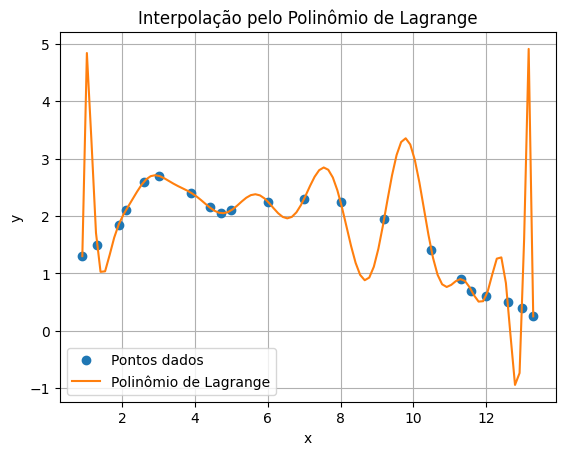

In [27]:
# Exemplo de uso
x_points = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y_points = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

x = [-1, 0 , 1, 2]
y = [1, 0, 1, 8]

# Gera o polinômio de Lagrange simbólico
polynomial = lagrange_interpolation(x_points, y_points)

# Exibir o polinômio resultante
print("Polinômio de Lagrange:")
sp.pprint(polynomial)

# Valores que queremos interpolar
x_values = np.linspace(min(x_points), max(x_points), 100)
y_values = [polynomial.subs(sp.symbols('x'), x_val) for x_val in x_values]

# Plotando o resultado
plt.plot(x_points, y_points, 'o', label='Pontos dados')
plt.plot(x_values, y_values, label='Polinômio de Lagrange')
plt.legend()
plt.title('Interpolação pelo Polinômio de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()